In [3]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Helpers
def move_still_possible(S):
    return not (S[S==0].size == 0)


def move_o(S):
    xs, ys = np.where(S==0)

    i = np.random.permutation(np.arange(xs.size))[0]
    
    S[xs[i],ys[i]] = -1

    return S

def move_x(S, vs, count):
    xs, ys = np.where(S==0)
    valid = False
    
    # first 10 games, play by selection
    if count < 10:
        while(not valid):
            print("Make a move: ", end="")
            i = int(input()) - 1
            x = i % 3
            y = i // 3

            if S[y, x] == 0:
                S[y, x] = 1
                valid = True
            else:
                print("Invalid move")
    
    # play by AI
    else:
        # AI choice
        if np.random.random_sample((0,1)) > 0.1:
            vs_values = vs[np.array_str(S)]
            valid_poses = [ys[i] * 3 + xs[i] for i in range(xs.size)]

            max_v = -np.inf
            i = -1
            for k in range(vs_values.size):
                if (vs_values[k] > max_v and k in valid_poses):
                    max_v = vs_values[k]
                    i = k

            S[xs[i],ys[i]] = 1

        # Rand choice
        else:
            i = np.random.permutation(np.arange(xs.size))[0]
            S[xs[i],ys[i]] = 1


    return S, i
    

def move_was_winning_move(S, p):
    if np.max((np.sum(S, axis=0)) * p) == 3:
        return True

    if np.max((np.sum(S, axis=1)) * p) == 3:
        return True

    if (np.sum(np.diag(S)) * p) == 3:
        return True

    if (np.sum(np.diag(np.rot90(S))) * p) == 3:
        return True

    return False

# print game state matrix using characters
def print_game_state(S):
    B = np.copy(S).astype(object)
    for n in [-1, 0, 1]:
        B[B==n] = symbols[n]
    print (B)


def updateVs(vs, tracker, lastMove, last_vs):
    # Tracker length
    n_0 = len(tracker) - 1

    # Traverse tracker in reverse order
    for x in range(n_0, -1, -1):
        # Update terminal state V(s)
        if (x == n_0):
            vs[np.array_str(tracker[x])][lastMove] = last_vs
            continue
        
        # Update previous states V(s)
        vs[np.array_str(tracker[x])] = (vs[np.array_str(tracker[x])] + 0.2 * (vs[np.array_str(tracker[x+1])] - vs[np.array_str(tracker[x])]))


def showStatistics(wins, count):
    freq = []
    for x in range(0, len(wins), 100):
        freq.append(wins[x-100:x].count(1) / 100)

    plt.plot(freq)
    plt.ylabel('Win frequency')
    plt.show()

In [5]:
# Symbols
# python dictionary to map integers (1, -1, 0) to characters ('x', 'o', ' ')
symbols = { 1:'x',
           -1:'o',
            0:' '}

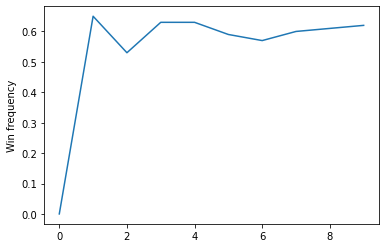

In [8]:
# Show learning curve
showStatistics(wins, countGame)